# Course-End Project: Healthcare


Problem statement:
Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. The data below has the information about the factors that might have an impact on cardiovascular health. 


| Variable    | Description |
| :---        |    :----   |
| Age      | Age in years       |
| Sex   | 1 = male; 0 = female        |
| cp      | Chest pain type |
| trestbps   | Resting blood pressure (in mm Hg on admission to the hospital)|
| chol      | Serum cholesterol in mg/dl |
| fbs   | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)|
| restecg      | Resting electrocardiographic results  |
| thalach      | Maximum heart rate achieved  |
| exang   | Exercise induced angina (1 = yes; 0 = no) |
| oldpeak      | ST depression induced by exercise relative to rest|
| slope      | Slope of the peak exercise ST segment|
| ca   | Number of major vessels (0-3) colored by fluoroscopy|
| thal      | 3 = normal; 6 = fixed defect; 7 = reversible defect|
| target      | 0 or 1  |

## Task to be performed: 

__1. Preliminary analysis:__  
a. Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.  
b. Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy.  

2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:
a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data  
b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot   
c.	Study the occurrence of CVD across the Age category  
d.	Study the composition of all patients with respect to the Sex category  
e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient  
f.	Describe the relationship between cholesterol levels and a target variable  
g.	State what relationship exists between peak exercising and the occurrence of a heart attack  
h.	Check if thalassemia is a major cause of CVD  
i.	List how the other factors determine the occurrence of CVD  
j.	Use a pair plot to understand the relationship between all the given variables  

3.	Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('1645792390_cep1_dataset.xlsx')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


************
___END OF TASK 1.___ There wasn't any missing data. and the duplicates removed.
************

In [7]:
# Separating numerical and categorical columns

num_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
catg_col = ['sex', 'cp', 'fbs', 'thal', 'ca', 'slope', 'exang', 'restecg', 'target']

In [8]:
# Unique values in each categorical columnns

for colm in catg_col:
    print(f'{colm} -->', df[colm].unique())

sex --> [1 0]
cp --> [3 2 1 0]
fbs --> [1 0]
thal --> [1 2 3 0]
ca --> [0 2 1 3 4]
slope --> [0 2 1]
exang --> [0 1]
restecg --> [0 1 2]
target --> [1 0]


In [9]:
##These columns changed to category

# df[catg_col] = df[catg_col].astype('category')

In [10]:
# df.info()

In [11]:
df[num_col].skew()

age        -0.203743
trestbps    0.716541
chol        1.147332
thalach    -0.532671
oldpeak     1.266173
dtype: float64

In [12]:
df[num_col].describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


## CVD across different categories


<Figure size 640x480 with 0 Axes>

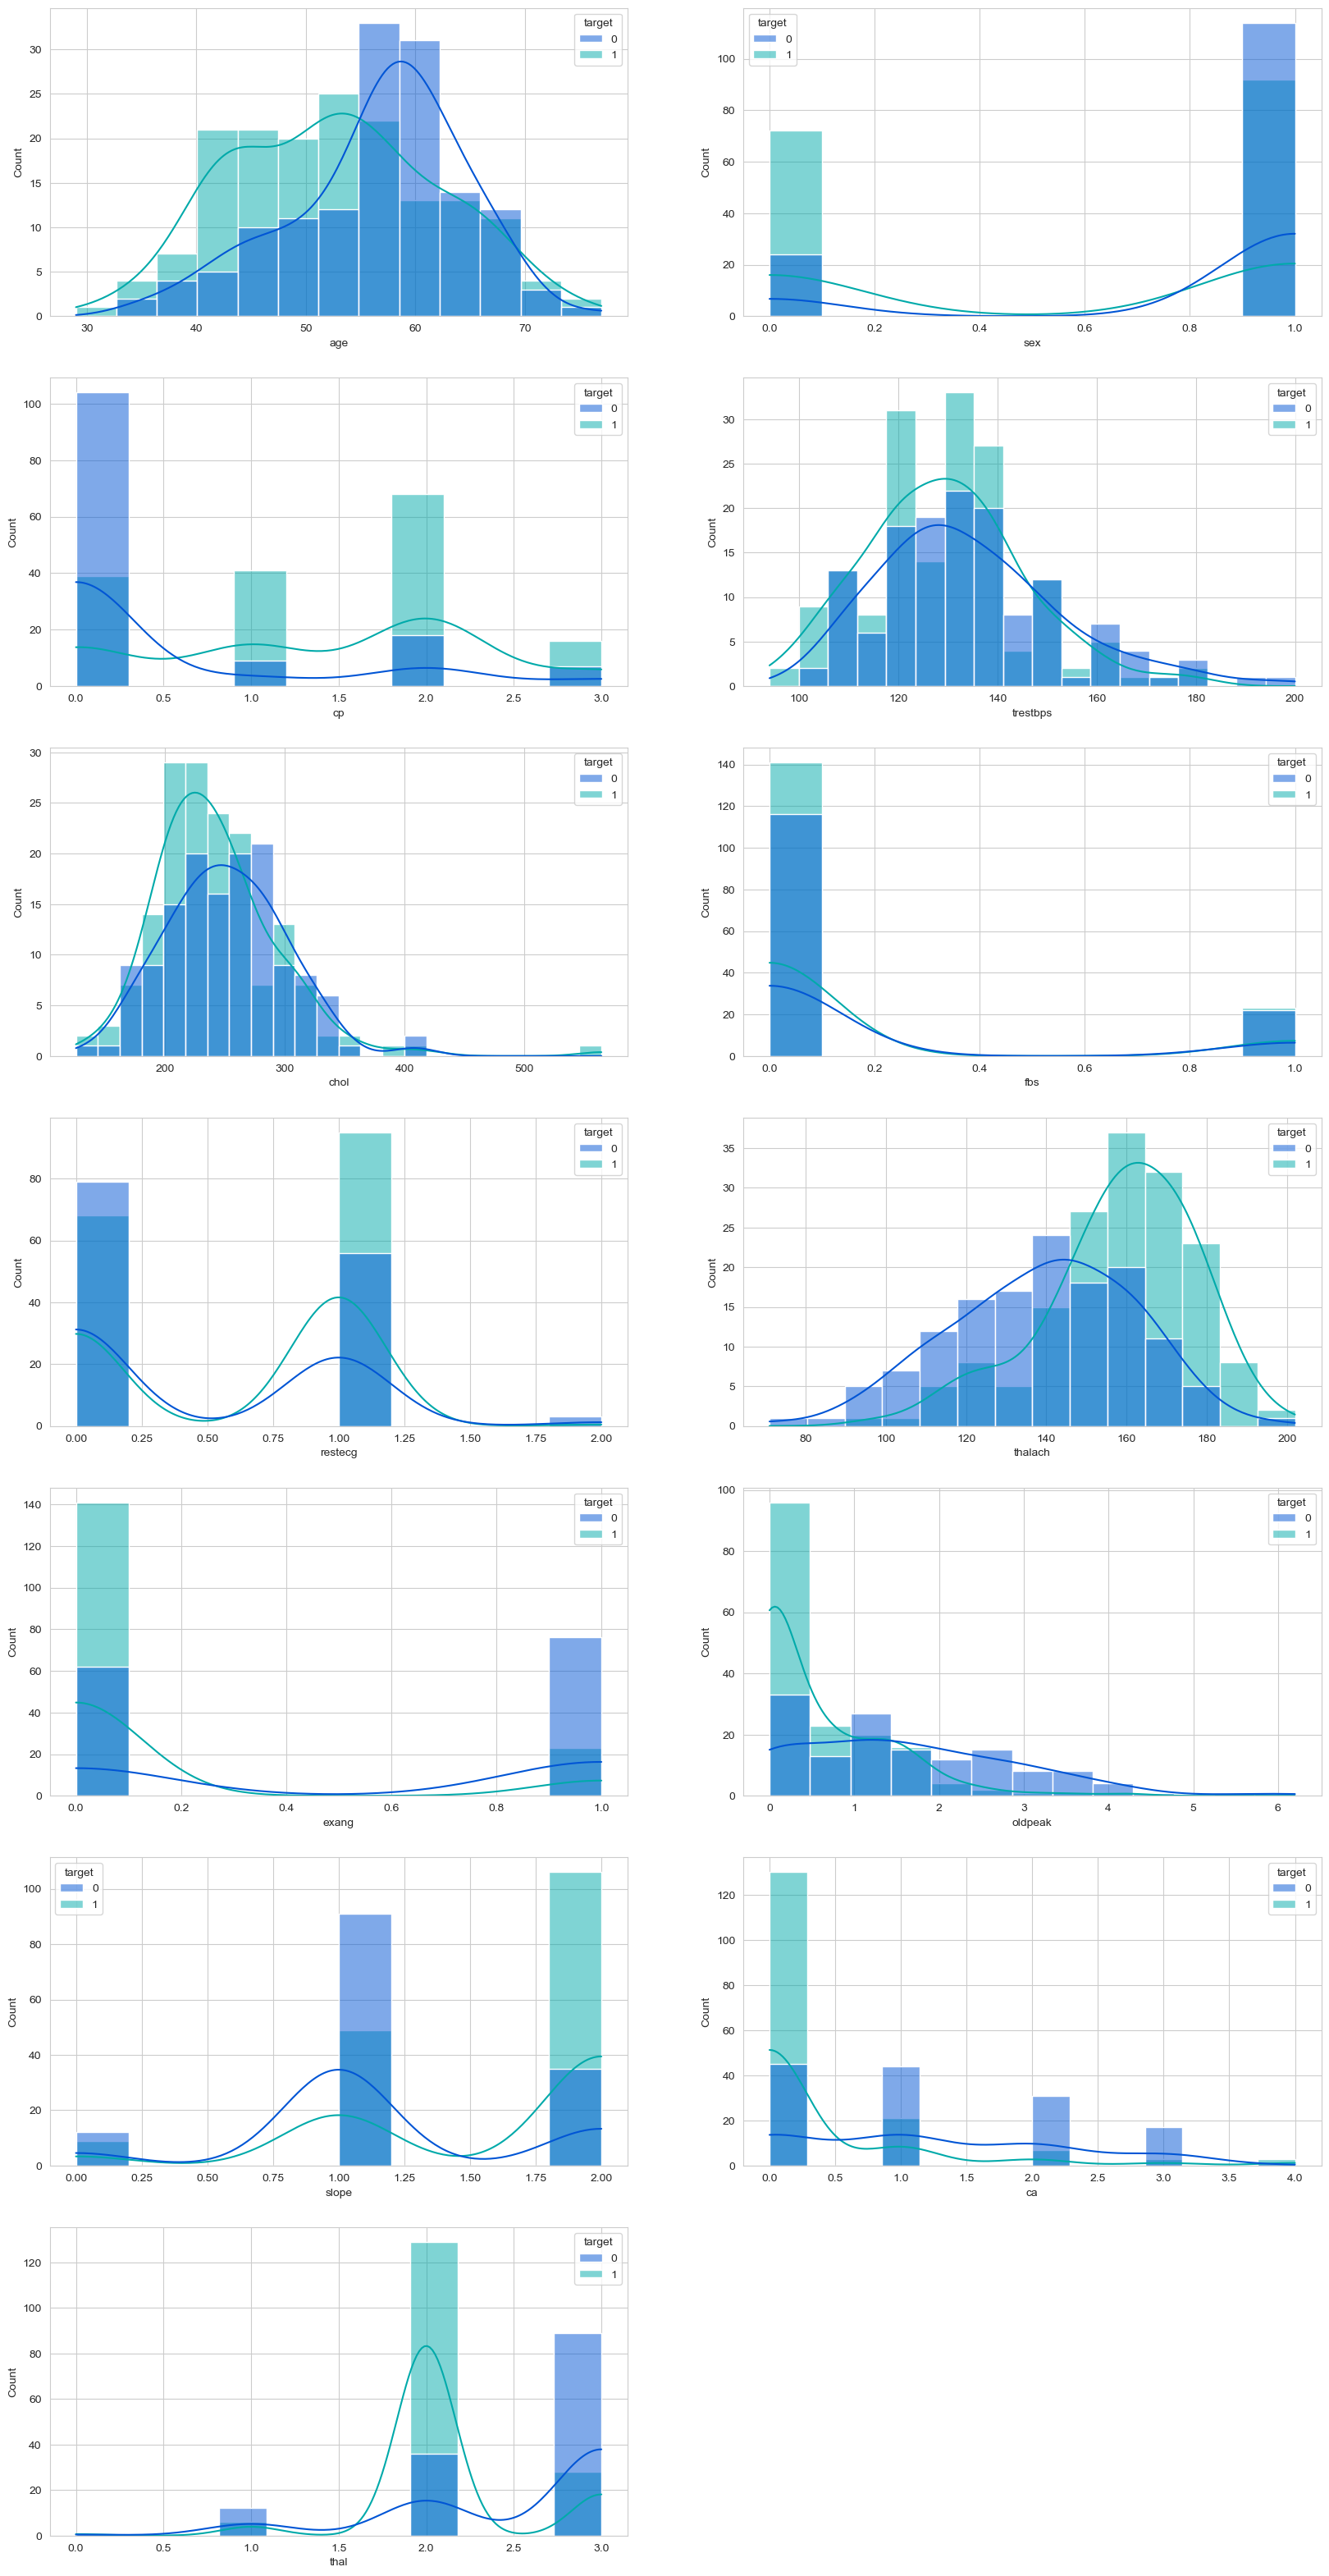

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.subplots_adjust(hspace=0.2)
color = 'winter'

fig, axes = plt.subplots(7, 2, figsize=(20,40))

# Flatten the axes array
axes = axes.ravel()

for i, feature in enumerate(df.columns):
    if feature != "target":
        sns.histplot(data=df, x=feature, kde=True, palette=color, hue='target', ax=axes[i])
        axes[-1].set_visible(False)

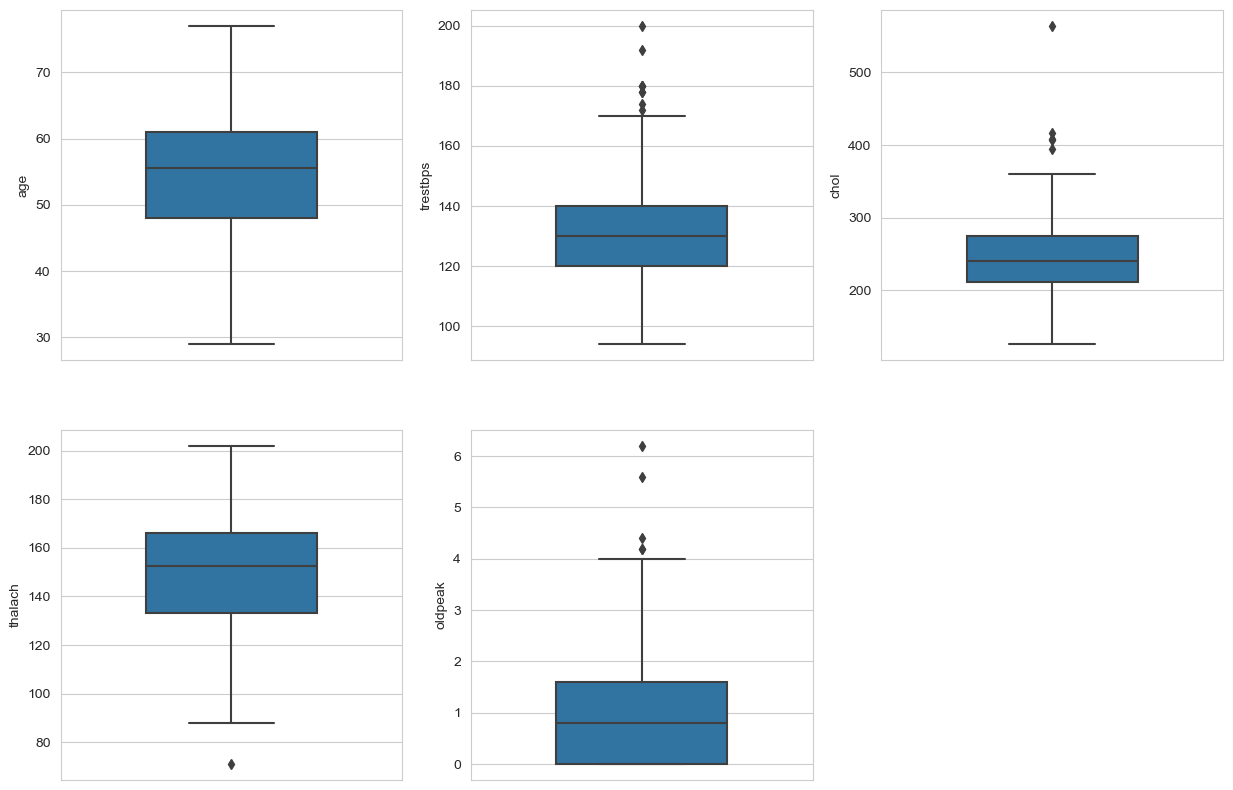

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

# Flatten the axes array
axes = axes.ravel()

for i, feature in enumerate(df[num_col].columns):
    
    sns.boxplot(data=df[num_col], y=feature, width=0.5, ax=axes[i])
    axes[-1].set_visible(False)


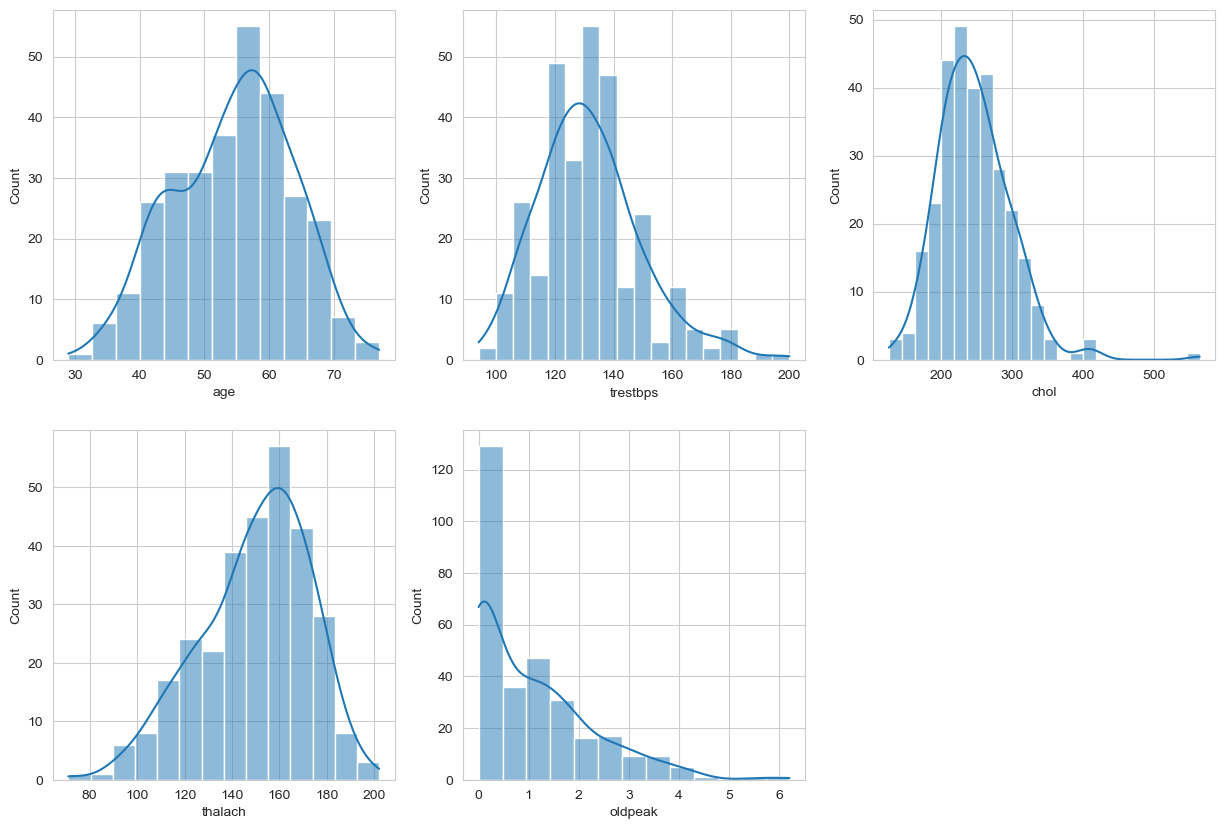

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

# Flatten the axes array
axes = axes.ravel()

for i, feature in enumerate(df[num_col].columns):
    
    sns.histplot(data=df[num_col], x=feature, kde=True, ax=axes[i])
    axes[-1].set_visible(False)

In [16]:
def detect_outliers(label):
    Q1 = df[label].quantile(0.25)
    Q3 = df[label].quantile(0.75)
    IQR = Q3 - Q1
    interval = ((df[label] > Q1 - 1.5*IQR) & (df[label] < Q3 + 1.5*IQR))
    return df[~interval]

In [17]:
outlier = []
for label in num_col:
    outlier.extend(detect_outliers(label).index.tolist())

outlier = sorted(list(set(outlier)))

## There are 28 outlier we can throw that away to improve the accuracy. But we keep it at the moment to see the accuracy with outliers

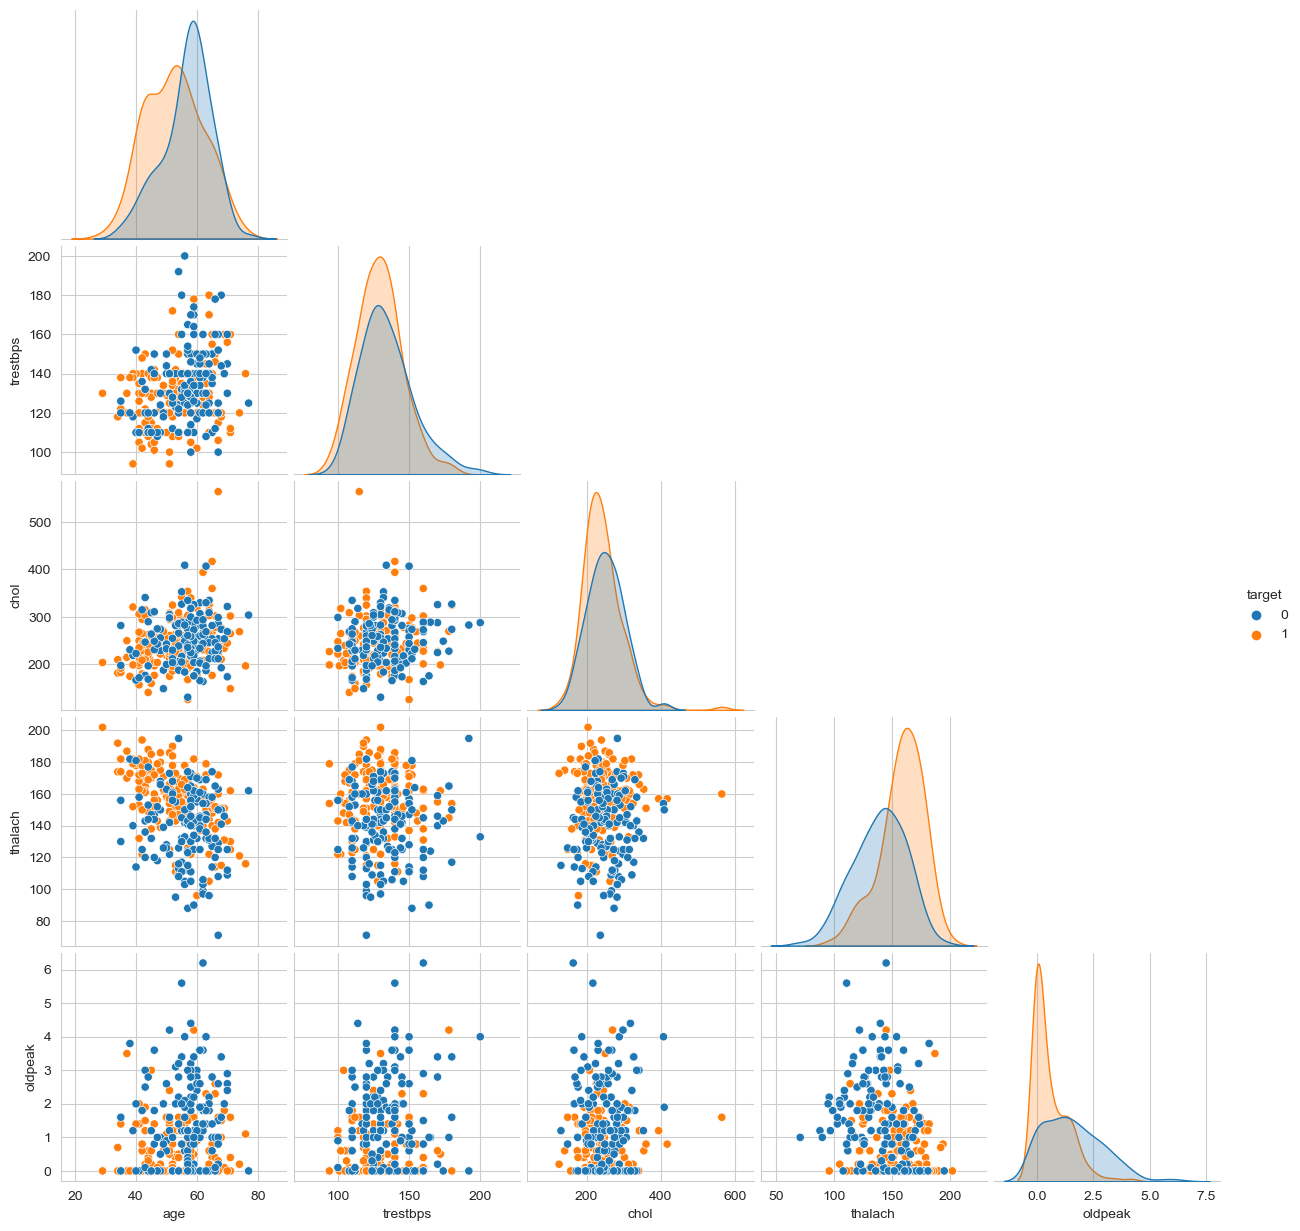

In [18]:
sns.pairplot(df[num_col+['target']], hue='target', corner=True)

<AxesSubplot:>

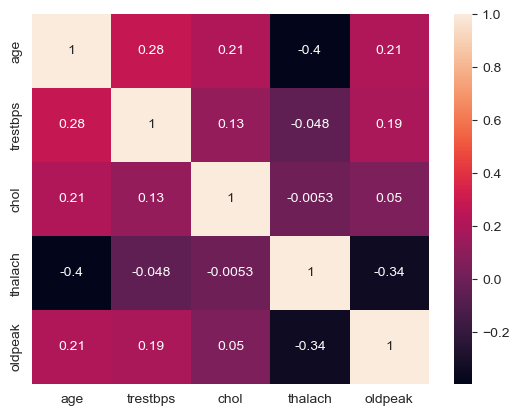

In [19]:
sns.heatmap(df[num_col].corr(), annot=True)

We have 2 options for data scaling :

1. __Normalization__
2. __Standardization.__  
As most of the algorithms assume the data to be normally (Gaussian) distributed, __Normalization__ is done for features whose data does not display normal distribution and __standardization__ is carried out for features that are normally distributed where their values are huge or very small as compared to other features.

__Normalization__ : __Oldpeak__ feature is normalized as it had displayed a right skewed data distribution.

__Standardizarion__ : __age__, __trestbps__, __chol__ and __thalach__ features are scaled down because these features are normally distributed.

In [20]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mmscaler = MinMaxScaler() # Normalization
sscaler = StandardScaler() # Standardization


num_col1 = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
num_col2 = ['oldpeak']
df[num_col1] = sscaler.fit_transform(df[num_col1])
df[num_col2] = mmscaler.fit_transform(df[num_col2])

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,0.370968,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,0.564516,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.225806,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,0.129032,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,0.096774,2,0,2,1


In [21]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score
from sklearn.metrics import confusion_matrix

In [22]:
X= df.drop('target', axis=1)
y= df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
def logestic_regression(X_train, X_test, y_train, y_test):
    
    # Define the hyperparameter grid
    param_grid = {
        'solver': ['liblinear', 'saga'],
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100],
        'penalty': ['l1', 'l2'] 
    }

    # Hyperparameter tuning with grid search
    lr_model = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
    lr_model.fit(X_train, y_train)
    
    # Get the best estimator
    best_estimator = lr_model.best_estimator_
    
    # Model fitting and evaluation
    y_pred = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    cross_val = cross_val_score(lr_model, X_train, y_train, scoring='roc_auc').mean()
    cm = confusion_matrix(y_test,y_pred)
    

    return (accuracy, f1score, cross_val, cm, best_estimator)


In [24]:
def svc_model(X_train, X_test, y_train, y_test):
    
    # Define the hyperparameter grid
    svc_params = {'C': [0.001, 0.01, 0.1, 1],
                  'kernel': [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]}

    # Hyperparameter tuning with grid search
    svc_model = GridSearchCV(SVC(), svc_params, cv=5) #Tuning the hyper-parameters
    svc_model.fit(X_train, y_train)
    
    # Get the best estimator
    best_estimator = svc_model.best_estimator_
    
    # Model fitting and evaluation
    y_pred = svc_model.predict(X_test)
    cross_val = (cross_val_score(svc_model,X_train,y_train,scoring = 'roc_auc').mean())
    f1score = f1_score(y_test,y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    cm = confusion_matrix(y_test, y_pred)


    return (accuracy, f1score, cross_val, cm , best_estimator)


In [25]:
def rf_model(X_train, X_test, y_train, y_test):
    # Define the hyperparameter grid
    rf_params = {
        'criterion': ['gini', 'entropy'],
        'n_estimators': list(range(5, 26, 5)),
        'max_depth': list(range(5, 20, 2)),
        'min_samples_leaf': [1, 5, 10, 20]
    }

    # Hyperparameter tuning with grid search
    rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
    rf_model.fit(X_train, y_train)
    
    # Get the best estimator
    best_estimator = rf_model.best_estimator_

    # Model fitting and evaluation
    y_pred = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    cross_val = cross_val_score(rf_model, X_train, y_train, scoring='roc_auc').mean()
    cm = confusion_matrix(y_test, y_pred)


    return (accuracy, f1score, cross_val, cm, best_estimator)


In [26]:
accuracy_lr, F1_score_lr, cross_val_lr, cm_lr, best_estimator_lr = logestic_regression(X_train, X_test, y_train, y_test)
accuracy_svc, F1_score_svc, cross_val_svc, cm_svc, best_estimator_svc = svc_model(X_train, X_test, y_train, y_test)
accuracy_rf, F1_score_rf, cross_val_rf, cm_rf, best_estimator_rf = rf_model(X_train, X_test, y_train, y_test)

In [27]:
# 

# kfold = model_selection.KFold(n_splits=5, random_state=101, shuffle=True)
num_trees = 50

model1 = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=num_trees, random_state=101)
model2 = BaggingClassifier(base_estimator=SVC(), n_estimators=num_trees, random_state=101)
model3 = BaggingClassifier(base_estimator=LogisticRegression(), random_state=101)

for model in [model1, model2, model3]:
    results = model_selection.cross_val_score(model, X, y, cv=5)
    print(results.mean())

0.8275956284153005
0.8210382513661202
0.8243169398907104


# Random forrest has better accuracy than SVC and logestic regression. Bagging classifier can't improve the model.

In [28]:
models = pd.DataFrame({
    'Model': ['LogisticRegression', 'SVC', 'RandomForest'],
    'Model Accuracy Score': [accuracy_lr, accuracy_svc, accuracy_rf],
    'Model f1 Score': [F1_score_lr, F1_score_svc, F1_score_rf],
    'Cross-validation score': [cross_val_lr, cross_val_svc, cross_val_rf],
    'Confusion matrix': [cm_lr, cm_svc, cm_rf],
    'Best estimator': [best_estimator_lr, best_estimator_svc, best_estimator_rf]
})


models.sort_values(by='Model Accuracy Score', ascending=False).set_index('Model')   

,Model Accuracy Score,Model f1 Score,Cross-validation score,Confusion matrix,Best estimator
Model,,,,,
RandomForest,0.852459,0.857143,0.912474,"[[25, 4], [5, 27]]","(DecisionTreeClassifier(max_depth=9, max_featu..."
SVC,0.836066,0.838710,0.897639,"[[25, 4], [6, 26]]","SVC(C=1, kernel='linear')"
LogisticRegression,0.819672,0.825397,0.893778,"[[24, 5], [6, 26]]","LogisticRegression(C=100, max_iter=1000, penal..."
